In [1]:
import os
import zipfile
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, Conv2D, MaxPool2D, Reshape
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [2]:
archive_path = 'archive.zip'

extracted_path = 'extracted_data'

with zipfile.ZipFile(archive_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

train_data_dir = os.path.join(extracted_path, 'train')

test_data_dir = os.path.join(extracted_path, 'test')

In [3]:
# Функция для загрузки данных из папки
def load_data(data_dir):
    # Список эмоций
    emotions = ['happy', 'neutral', 'sad']
    
    # Инициализация списков для изображений и их меток
    images = []
    labels = []
    
    # Проход по каждой эмоции
    for idx, emotion in enumerate(emotions):
        # Путь к папке с изображениями для данной эмоции
        emotion_dir = os.path.join(data_dir, emotion)
        
        # Проход по каждому изображению в папке
        for img_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, img_name)
            # Загрузка изображения
            img = cv2.imread(img_path)
            # Преобразование изображения в оттенки серого
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Добавление изображения и его метки в списки
            images.append(img_gray)
            labels.append(idx)  # Используем индекс эмоции в списке эмоций как метку
    
    # Преобразование списков в массивы NumPy
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

In [4]:
X_train, y_train = load_data(train_data_dir)


X_test, y_test = load_data(test_data_dir)

# Добавление размерности каналов
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [5]:
# Преобразование меток в формат one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Нормализация 
X_train = X_train / 255.0
X_test = X_test / 255.0

class_num = 3

In [6]:
print(X_train.shape[1:])

(48, 48, 1)


In [7]:
model = Sequential()
#block 1
model.add(Reshape((48,48,1),input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer='he_normal',activation = 'elu', input_shape = (48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer='he_normal',activation = 'elu'))
model.add(BatchNormalization())
model.add(MaxPool2D( (2,2), padding = 'same'))
model.add(Dropout(0.5))
#block 2
model.add(Conv2D(64, (3, 3), padding = 'same',kernel_initializer='he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding = 'same', kernel_initializer='he_normal',activation = 'elu'))
model.add(BatchNormalization())
model.add(MaxPool2D( (2,2), padding = 'same'))
model.add(Dropout(0.5))
#block 3
model.add(Conv2D(128, (3, 3), padding = 'same', kernel_initializer='he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding = 'same', kernel_initializer='he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(MaxPool2D( (2,2), padding = 'same'))
model.add(Dropout(0.5))
#block 4
model.add(Conv2D(256, (3, 3), padding = 'same', kernel_initializer='he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding = 'same', kernel_initializer='he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(MaxPool2D( (2,2), padding = 'same'))
model.add(Dropout(0.5))
#block 5
model.add(Conv2D(512, (3, 3), padding = 'same', kernel_initializer='he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding = 'same', kernel_initializer='he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(MaxPool2D( (2,2), padding = 'same'))
model.add(Dropout(0.5))
#Block6
model.add(Flatten())
model.add(Dense(256, kernel_initializer='he_normal', activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#block7
model.add(Dense(128, kernel_initializer='he_normal', activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#block8
model.add(Dense(64, kernel_initializer='he_normal', activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#block8
model.add(Dense(3, activation = 'softmax'))

In [8]:
checkpoint = ModelCheckpoint('C:/Emotion_3.k',
                           monitor='val_loss',
                           mode='min',
                           save_best_only=True,
                           verbose=1)

In [9]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                            factor=0.5,
                            patience=4,
                            verbose=1,
                            min_lr=1e-7)

In [10]:
callbacks = [checkpoint,reduce_lr]

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# если sparce_categorical_crossentropy , callbacks то не работает

In [12]:
history = model.fit(X_train, y_train, batch_size=16, epochs = 40, validation_data = (X_test, y_test),callbacks=callbacks)

Epoch 1/40
1064/1064 [==============================] - ETA: 0s - loss: 1.2808 - accuracy: 0.3758
Epoch 1: val_loss improved from inf to 1.08263, saving model to C:/Emotion_3.k
INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


1064/1064 [==============================] - 278s 258ms/step - loss: 1.2808 - accuracy: 0.3758 - val_loss: 1.0826 - val_accuracy: 0.4299 - lr: 0.0010
Epoch 2/40
1064/1064 [==============================] - ETA: 0s - loss: 1.0189 - accuracy: 0.4769
Epoch 2: val_loss did not improve from 1.08263
1064/1064 [==============================] - 270s 254ms/step - loss: 1.0189 - accuracy: 0.4769 - val_loss: 1.1999 - val_accuracy: 0.4920 - lr: 0.0010
Epoch 3/40
1064/1064 [==============================] - ETA: 0s - loss: 0.9212 - accuracy: 0.5527
Epoch 3: val_loss improved from 1.08263 to 0.77988, saving model to C:/Emotion_3.k
INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


1064/1064 [==============================] - 274s 258ms/step - loss: 0.9212 - accuracy: 0.5527 - val_loss: 0.7799 - val_accuracy: 0.6387 - lr: 0.0010
Epoch 4/40
1064/1064 [==============================] - ETA: 0s - loss: 0.8105 - accuracy: 0.6234
Epoch 4: val_loss improved from 0.77988 to 0.73183, saving model to C:/Emotion_3.k
INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


1064/1064 [==============================] - 279s 263ms/step - loss: 0.8105 - accuracy: 0.6234 - val_loss: 0.7318 - val_accuracy: 0.6615 - lr: 0.0010
Epoch 5/40
1064/1064 [==============================] - ETA: 0s - loss: 0.7690 - accuracy: 0.6495
Epoch 5: val_loss improved from 0.73183 to 0.67988, saving model to C:/Emotion_3.k
INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


1064/1064 [==============================] - 276s 260ms/step - loss: 0.7690 - accuracy: 0.6495 - val_loss: 0.6799 - val_accuracy: 0.6944 - lr: 0.0010
Epoch 6/40
1064/1064 [==============================] - ETA: 0s - loss: 0.7286 - accuracy: 0.6738
Epoch 6: val_loss improved from 0.67988 to 0.64021, saving model to C:/Emotion_3.k
INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


1064/1064 [==============================] - 278s 262ms/step - loss: 0.7286 - accuracy: 0.6738 - val_loss: 0.6402 - val_accuracy: 0.7139 - lr: 0.0010
Epoch 7/40
1064/1064 [==============================] - ETA: 0s - loss: 0.7080 - accuracy: 0.6896
Epoch 7: val_loss improved from 0.64021 to 0.62750, saving model to C:/Emotion_3.k
INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


1064/1064 [==============================] - 277s 260ms/step - loss: 0.7080 - accuracy: 0.6896 - val_loss: 0.6275 - val_accuracy: 0.7212 - lr: 0.0010
Epoch 8/40
1064/1064 [==============================] - ETA: 0s - loss: 0.6786 - accuracy: 0.7071
Epoch 8: val_loss improved from 0.62750 to 0.59979, saving model to C:/Emotion_3.k
INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


1064/1064 [==============================] - 275s 259ms/step - loss: 0.6786 - accuracy: 0.7071 - val_loss: 0.5998 - val_accuracy: 0.7379 - lr: 0.0010
Epoch 9/40
1064/1064 [==============================] - ETA: 0s - loss: 0.6661 - accuracy: 0.7181
Epoch 9: val_loss did not improve from 0.59979
1064/1064 [==============================] - 271s 254ms/step - loss: 0.6661 - accuracy: 0.7181 - val_loss: 0.6080 - val_accuracy: 0.7318 - lr: 0.0010
Epoch 10/40
1064/1064 [==============================] - ETA: 0s - loss: 0.6435 - accuracy: 0.7246
Epoch 10: val_loss improved from 0.59979 to 0.57992, saving model to C:/Emotion_3.k
INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


1064/1064 [==============================] - 274s 258ms/step - loss: 0.6435 - accuracy: 0.7246 - val_loss: 0.5799 - val_accuracy: 0.7471 - lr: 0.0010
Epoch 11/40
1064/1064 [==============================] - ETA: 0s - loss: 0.6333 - accuracy: 0.7322
Epoch 11: val_loss did not improve from 0.57992
1064/1064 [==============================] - 269s 252ms/step - loss: 0.6333 - accuracy: 0.7322 - val_loss: 0.6315 - val_accuracy: 0.7221 - lr: 0.0010
Epoch 12/40
1064/1064 [==============================] - ETA: 0s - loss: 0.6123 - accuracy: 0.7442
Epoch 12: val_loss improved from 0.57992 to 0.56436, saving model to C:/Emotion_3.k
INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


1064/1064 [==============================] - 272s 256ms/step - loss: 0.6123 - accuracy: 0.7442 - val_loss: 0.5644 - val_accuracy: 0.7588 - lr: 0.0010
Epoch 13/40
1064/1064 [==============================] - ETA: 0s - loss: 0.5926 - accuracy: 0.7531
Epoch 13: val_loss did not improve from 0.56436
1064/1064 [==============================] - 268s 252ms/step - loss: 0.5926 - accuracy: 0.7531 - val_loss: 0.5660 - val_accuracy: 0.7581 - lr: 0.0010
Epoch 14/40
1064/1064 [==============================] - ETA: 0s - loss: 0.5766 - accuracy: 0.7609
Epoch 14: val_loss did not improve from 0.56436
1064/1064 [==============================] - 270s 254ms/step - loss: 0.5766 - accuracy: 0.7609 - val_loss: 0.5899 - val_accuracy: 0.7513 - lr: 0.0010
Epoch 15/40
1064/1064 [==============================] - ETA: 0s - loss: 0.5743 - accuracy: 0.7623
Epoch 15: val_loss improved from 0.56436 to 0.54956, saving model to C:/Emotion_3.k
INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


1064/1064 [==============================] - 275s 258ms/step - loss: 0.5743 - accuracy: 0.7623 - val_loss: 0.5496 - val_accuracy: 0.7595 - lr: 0.0010
Epoch 16/40
1064/1064 [==============================] - ETA: 0s - loss: 0.5589 - accuracy: 0.7717
Epoch 16: val_loss did not improve from 0.54956
1064/1064 [==============================] - 268s 252ms/step - loss: 0.5589 - accuracy: 0.7717 - val_loss: 0.5590 - val_accuracy: 0.7588 - lr: 0.0010
Epoch 17/40
1064/1064 [==============================] - ETA: 0s - loss: 0.5486 - accuracy: 0.7751
Epoch 17: val_loss did not improve from 0.54956
1064/1064 [==============================] - 269s 253ms/step - loss: 0.5486 - accuracy: 0.7751 - val_loss: 0.5513 - val_accuracy: 0.7612 - lr: 0.0010
Epoch 18/40
1064/1064 [==============================] - ETA: 0s - loss: 0.5354 - accuracy: 0.7811
Epoch 18: val_loss improved from 0.54956 to 0.54354, saving model to C:/Emotion_3.k
INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


1064/1064 [==============================] - 272s 256ms/step - loss: 0.5354 - accuracy: 0.7811 - val_loss: 0.5435 - val_accuracy: 0.7722 - lr: 0.0010
Epoch 19/40
1064/1064 [==============================] - ETA: 0s - loss: 0.5287 - accuracy: 0.7837
Epoch 19: val_loss improved from 0.54354 to 0.54128, saving model to C:/Emotion_3.k
INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3.k\assets


1064/1064 [==============================] - 273s 257ms/step - loss: 0.5287 - accuracy: 0.7837 - val_loss: 0.5413 - val_accuracy: 0.7703 - lr: 0.0010
Epoch 20/40
1064/1064 [==============================] - ETA: 0s - loss: 0.5231 - accuracy: 0.7891
Epoch 20: val_loss did not improve from 0.54128
1064/1064 [==============================] - 272s 256ms/step - loss: 0.5231 - accuracy: 0.7891 - val_loss: 0.5663 - val_accuracy: 0.7583 - lr: 0.0010
Epoch 21/40
1064/1064 [==============================] - ETA: 0s - loss: 0.5059 - accuracy: 0.7985
Epoch 21: val_loss did not improve from 0.54128
1064/1064 [==============================] - 272s 255ms/step - loss: 0.5059 - accuracy: 0.7985 - val_loss: 0.5434 - val_accuracy: 0.7727 - lr: 0.0010
Epoch 22/40
1064/1064 [==============================] - ETA: 0s - loss: 0.4900 - accuracy: 0.8045
Epoch 22: val_loss did not improve from 0.54128
1064/1064 [==============================] - 272s 255ms/step - loss: 0.4900 - accuracy: 0.8045 - val_loss: 0.

In [13]:
model.save('last_epoch_new.k')

INFO:tensorflow:Assets written to: last_epoch_new.k\assets


INFO:tensorflow:Assets written to: last_epoch_new.k\assets


In [14]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 78.19%


In [15]:
import matplotlib.pyplot as plt

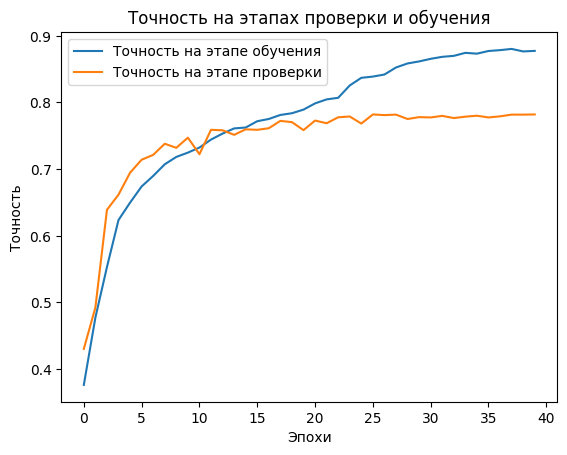

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность на этапах проверки и обучения')
plt.ylabel('Точность')
plt.xlabel('Эпохи')
plt.legend(['Точность на этапе обучения', 'Точность на этапе проверки'], loc='upper left')
plt.show()

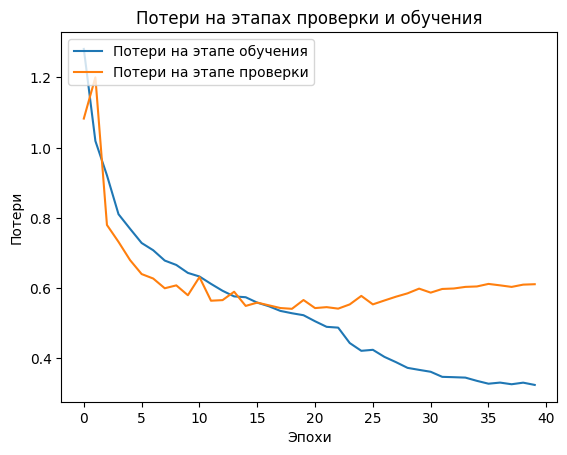

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери на этапах проверки и обучения')
plt.ylabel('Потери')
plt.xlabel('Эпохи')
plt.legend(['Потери на этапе обучения', 'Потери на этапе проверки'], loc='upper left')
plt.show()